In [71]:
# 다양한 머신러닝 알고리즘을 이용.
# 교차검증 방식으로 모델을 훈련시키고 예측 정확도를 평가해 줌

import nltk
nltk.download('stopwords') # 불용어 사전 다운로드

from nltk.corpus import stopwords
stopWords = stopwords.words('english')

import math
import re
import sklearn
import image
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import load_digits

# predictive modeling 계열 (의사결정나무, 랜덤포레스트, 로지스틱 회귀, Knearest 등) <- Kmeans 어따 빼먹음
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 모델 검증 관련 (정확도)
from sklearn.metrics import accuracy_score

# preprocessing (전처리) 그룹
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder



# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False) 
# 바로 위 1줄이면 그 위위 2줄과 동일

from sklearn.base import BaseEstimator

from sklearn.metrics import confusion_matrix # 혼동행렬
from pandas.plotting import scatter_matrix


from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# import mglearn <------------------------------------------------------------------------ 확인 필요. 오류남


# score류 (predictive modeling을 평가하는 지표)
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 민감도(재현율)
from  sklearn.metrics import f1_score # F1 스코어 (정밀도, 민감도 조화평균..)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error



# Vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# ROC

# Receiver Operation Characteristics Curve
# 수신자 판단 곡선

# 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
# 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용

# 특이도(FPR)가 변할 때 민감도가 어떻게 변하는지 알아보기 위한 곡선

# 환자 중 보균자p/정상인n 있는 경우
# 재현율 : 보균자를 보균자로 양성 판정
# 특이도 : 정상인을 정상인으로 음성 판정

# -_-;;; -------------------------------------------------------------------------------


# AUC 

# Area Under Curve
# ROC 곡선 밑의 면적을 구한 값
# 1에 가까울수록 좋은 수치를 의미함


## 리지, 라쏘 회귀 - 과적합을 피하기 위함

# 가중치에 계약조건을 설정해서 회귀를 구하는 알고리즘
# 이를 통해 모델의 복잡도를 다소 낮춰 적당한 편향/분산을 통해
# 적절한 회귀모델을 구함

# 일반적인 회귀분석 : 회귀계수 추정량을 구함
# 잔차의 제곱합을 최소로 하는 최소제곱법 사용

# 실제 회귀모델은 단일변수가 아닌 다중변수가 많음

# 독립변수 증가 => 변수간 강한 상관관계 => 다중공선성 문제 발생
# => 최소제곱법을 이용한 회귀계수 추정량이 커짐 => 정확도 저하

# 따라서, 중요한 변수를 선정하고, 중요하지 않은 변수는 제외
# => 변수선택(feature selection)
# 중요하지 않은 변수에 해당하는 계수 절대값을 낮춤



## 라쏘회귀(L1 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수의 계수는 축소 => 0으로 설정
# 기울기를 완전히 줄여 특정 특성이 모델에 주는 영향을 제외시킴


## 리지회귀(L2 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수의 계수는 축소 => 0에 가깝게 설정
# 기울기를 다소 줄여 특정 특성이 모델에 주는 영향을 축소시킴


## 엘라스틱넷 회귀
# 라쏘회귀와 리지회귀의 제약을 합친 모형

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# 로지스틱 회귀를 이용한 스팸 분류

sms = pd.read_csv('SMSSpam.txt', sep='\t', header=None)
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# 정상메일ham과 광고메일spam 수량 확인

print(sms.count())
print(sms[sms[0] == 'ham'].head())
print('-------------------------------------')
print('spam', sms[0].value_counts())
print('-------------------------------------')
print('spam', sms[0].value_counts()[0])
print('-------------------------------------')
print('ham', sms[0].value_counts()[1])
print('-------------------------------------')
print('ham', sms[sms[0] == 'ham'][0].count())
print('ham', sms[0].value_counts()[0])
print('spam', sms[sms[0] == 'spam'][0].count())
print('spam', sms[0].value_counts()[0])

#smsvc = sms[sms.iloc[:,0] == 'ham'].value_counts()
#print(smsvc)
#print('---------------------------------')
#print('ham' )
#print('spam')

0    5572
1    5572
dtype: int64
     0                                                  1
0  ham  Go until jurong point, crazy.. Available only ...
1  ham                      Ok lar... Joking wif u oni...
3  ham  U dun say so early hor... U c already then say...
4  ham  Nah I don't think he goes to usf, he lives aro...
6  ham  Even my brother is not like to speak with me. ...
-------------------------------------
spam ham     4825
spam     747
Name: 0, dtype: int64
-------------------------------------
spam 4825
-------------------------------------
ham 747
-------------------------------------
ham 4825
ham 4825
spam 747
spam 4825


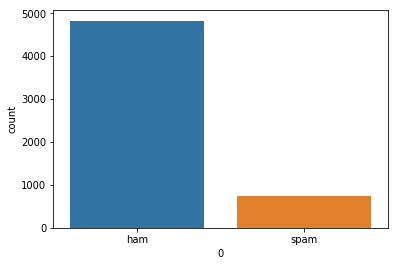

In [0]:
# ham/spam 시각화

import seaborn as sns

sns.countplot(sms[0])
plt.show()

In [29]:
# 데이터 전처리1
# 종속변수인 sms[0]은 레이블인코딩 처리

sms['target'] = pd.Categorical(sms[0])
sms['target'] = sms['target'].cat.codes


# 데이터 전처리2
# 종속변수인 sms[1]은 BOW 처리

# BOW : Bag Of Words
# 문자/문서를 숫자벡터로 변환하는 것을 의미.
# 먼저, 전체 문자/문서에 대한 단어장을 생성. 그런 다음, 문서 내 단어의 출현빈도를 측정해서 개별 단어장에 저장

# BOW 문서 전처리 종류
# 머신러닝으로 분석하는 사례 중 텍스트를 이용해야 하는 경우가 있음
# 이런 경우 문자를 벡터값으로 인코딩해서 처리해야 함

# DicVectorizer : 각 단어를 세어 사전 생성
# CountVectorizer
# Vectorizer
# Vectorizer
# Vectorizer

from sklearn.feature_extraction.text import CountVectorizer
texts = ['UNC played Duke in baseball', 
         'Duke lost the basketball game']

vectors = CountVectorizer()
dicts = vectors.fit_transform(texts)

#print(dicts)
print('-----------------------------------')
print('변환된 벡터값', dicts.todense())
print('-----------------------------------')
print('추출된 어휘집', vectors.vocabulary_)
# 알파벳 순으로 texts를 정렬한 후 순번 부여


# 만일 새로운 문장을 추가한다면?
texts.append('Is this last document')
dicts = vectors.fit_transform(texts)
print('-------------------------------------------------------------------------------------------------------------------------------------------------------')
print('변환된 벡터값', dicts.todense())
print('-----------------------------------')
print('추출된 어휘집', vectors.vocabulary_)

-----------------------------------
변환된 벡터값 [[1 0 1 0 1 0 1 0 1]
 [0 1 1 1 0 1 0 1 0]]
-----------------------------------
추출된 어휘집 {'unc': 8, 'played': 6, 'duke': 2, 'in': 4, 'baseball': 0, 'lost': 5, 'the': 7, 'basketball': 1, 'game': 3}
-------------------------------------------------------------------------------------------------------------------------------------------------------
변환된 벡터값 [[1 0 0 1 0 1 0 0 0 1 0 0 1]
 [0 1 0 1 1 0 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 1 1 0 0 0 1 0]]
-----------------------------------
추출된 어휘집 {'unc': 12, 'played': 9, 'duke': 3, 'in': 5, 'baseball': 0, 'lost': 8, 'the': 10, 'basketball': 1, 'game': 4, 'is': 6, 'this': 11, 'last': 7, 'document': 2}


In [0]:
# TfidVectorizer 예제
# term frequency : 전체 문서 대비 특정 단어 빈도수

# inverse document frequency : 특정 문서 대비 특정 단어가 출현하는 빈도

# Tfidf:
# 텍스트마이닝에서 이용하는 가중치 부여방식으로 여러 문서가 이루어진 문서 군에서 어떤 단어가 특정 문서 상에서 얼마나 중요한 거싱ㄴ지를 의미하는 통계적 수치

# Tf가 크면 (여러 문서에 단어가 출현) => 자주 등장 => 중요
# idf가 크면 (특정 문서에 단어가 출현) => 자주 등장 => 가중치

# 둘은 서로 역수 관계 <- needs further research

# 예) 신문과 방송에서 '독감' 언급 : Tf가 높음 (일반화)
# 예) 특정 언론에서 '태블릿'을 언급 : idf가 높음 (희소성)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


texts = ['UNC played Duke in baseball', 
         'Duke lost the basketball game']

vectors = TfidfVectorizer()
dicts = vectors.fit_transform(texts)

#print(dicts)
print('-----------------------------------')
print('변환된 벡터값', dicts.todense())
print('-----------------------------------')
print('추출된 어휘집', vectors.vocabulary_)
# 알파벳 순으로 texts를 정렬한 후 순번 부여


# 만일 새로운 문장을 추가한다면?
texts.append('Is this last document')
dicts = vectors.fit_transform(texts)
print('-------------------------------------------------------------------------------------------------------------------------------------------------------')
print('변환된 벡터값', dicts.todense())
print('-----------------------------------')
print('추출된 어휘집', vectors.vocabulary_)


-----------------------------------
변환된 벡터값 [[0.47107781 0.         0.33517574 0.         0.47107781 0.
  0.47107781 0.         0.47107781]
 [0.         0.47107781 0.33517574 0.47107781 0.         0.47107781
  0.         0.47107781 0.        ]]
-----------------------------------
추출된 어휘집 {'unc': 8, 'played': 6, 'duke': 2, 'in': 4, 'baseball': 0, 'lost': 5, 'the': 7, 'basketball': 1, 'game': 3}
-------------------------------------------------------------------------------------------------------------------------------------------------------
변환된 벡터값 [[0.46735098 0.         0.         0.35543247 0.         0.46735098
  0.         0.         0.         0.46735098 0.         0.
  0.46735098]
 [0.         0.46735098 0.         0.35543247 0.46735098 0.
  0.         0.         0.46735098 0.         0.46735098 0.
  0.        ]
 [0.         0.         0.5        0.         0.         0.
  0.5        0.5        0.         0.         0.         0.5
  0.        ]]
-------------------------------

In [31]:
import nltk
nltk.download('stopwords') # 불용어 사전 다운로드

from nltk.corpus import stopwords
stopWords = stopwords.words('english')


data = sms[1].values
target = sms[0].values

#print(data)
#print(target)

data = [word for word in data if not word in stopWords] # 데이터에서 한 행을 불러와서, 각각의 단어가 불용어인지 아닌지
print(data)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been select

In [32]:
# 필기 - 이욱

# 로지스틱 회귀 분석을 통한 스팸분류

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#import mglearn


# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False)

# 간단한 데이터셋 생성



sms = pd.read_csv('SMSSpam.txt', sep='\t', header=None)
sms.head()

# 정상메일ham과 광고메일spam 수량 확인
# sms[sms.iloc[:,0] == 'ham'].count()
# sms[sms.iloc[:,0] == 'spam'].count()
print(sms[sms[0] == 'ham'][0].count())
print(sms[sms[0] == 'spam'][0].count())
print('ham', sms[0].value_counts()[0])
print('spam', sms[0].value_counts()[1])

# 데이터 전처리1
# 종속변수인 sms[0]은 레이블 인코딩 처리
sms['target'] = pd.Categorical(sms[0])
sms['target'] = sms['target'].cat.codes

# 데이터 전처리2
# 종속변수인 sms[1]은 BOW 처리

# BOW : bag of words
# BOW : 문자/문서를 숫자로 변환하는 것을의미

# 전체 문자/문서에 대한 단어장을 생성
# -> 문서 내 단어의 출현빈도를 측정 후 개별 단어장에 저장

# BOW 문서 전처리 종류
# 머신러닝으로 분석하는 사례 중 텍스트를 이용해야 하는 경우가 있음
# 이런 경우 문자를 벡터값으로 인코딩해서 처리해야 함

# DictVectorizer    : 각 단어를 세어 사전 생성
# CountVectorizer   : 단어 토큰을 만들고 각 단어수를 세어 사전 생성
# TfidfVectorizer    : 각 단어에 가중치를 두어 사전 생성
# HachingVectorizer : 빠른 처리를 위해 단어 토큰생성시 해시함수 사용


# CountVectorizer 예제
from sklearn.feature_extraction.text import CountVectorizer

texts = ['UNC played Duke in baseball', 'Duke lost the basketball game']
vectors = CountVectorizer()
dicts = vectors.fit_transform(texts)

print('변환된 벡터값', dicts.todense())
print('추출된 어휘집', vectors.vocabulary_)

# 'UNC played Duke in baseball', 'Duke lost the basketball game'
# 에 있는 단어들을 소문자로 바꾸고 알파벳순으로 정렬 후 순번을 매김
# (unc':8,'played':6,'duke':2,'in':4,'baseball':0,'lost':5,'the':7,'basketball':1,'game':3}
# [0,0,0,0,0,0,0,0,0]에서 단어가 나오면 해당 순번에 카운팅을 함
# 'UNC played Duke in baseball' => [1 0 1 0 1 0 1 0 1]
# 'Duke lost the basketball game' => [0 1 1 1 0 1 0 1 0]

# 각 문서의 내용을 토큰(문자) 리스트로 생성
# 각 문서에서 토근의 출현 순서를 셈 (알파벳 기준)
# 각 문서를 BOW 벡터값으로 변환

# 만일 새로운 문장을 추가한다면?
texts.append('Is this last document')
dicts = vectors.fit_transform(texts)

print('변환된 벡터값', dicts.todense())
print('추출된 어휘집', vectors.vocabulary_)


# TfidfVectorizer 예제
# term frequcency : 해당 단어 빈출 정도를 의미
# inverse document frequcency : 특정 문서대비 특정 단어가 출현하는 빈도
# Tfidf : 텍스트 마이닝에서 이용하는 가중치 부여방식으로 여러 문서가
# 이루어진 문서군에서 어떤 단어가 특정문서상에서 얼마나 중요한 것인지를
# 의미하는 통계적 수치
# Tf와 idf는 서로 역수관계

# Tf가 크면(여러 문서에 단어가 출현) => 자주 등장 => 중요함
# idf가 크면(특정 문서에 단어가 출현) => 자주등장 => 중요함 -> 가중치

# 예) 신문과 방송에서 '독감'을 언급 : Tf가 높음(일반성)
# 예) 특정 언론에서 '태블릿'을 언급 : idf가 높음(희소성)



# idf = log(전체문서수/단어가 나타난 문서수)+1

# 값이 발산되는 것을 막는 옵션
# smooth_idf = True =====> log((1+전체문서수)/(1+단어가 나타난 문서수))+1

# norm = 12 (기본값), 유클리디언 정규화 (K근접이웃, K-means에 모두 사용... -_-;;)
# vnorm = v / ||v||

# sublinear_tf = True로 설정
# log(tf)+1

# 모든 문서에 특정 단어가 많이 등정하는 경우 => 희소성 떨어짐 => 모든 문서에 등장하는 흔한 단어
# => tfidf 가중치를 낮춰야 함. 따라서 일반성df이 클수록 tfidf 가중치를 낮춰야 하므로 df를 역수로 취함 => idf 


# 단점 : 단어의 등장횟수가 증가할수록 무한대로 발산
# 이런 점을 방지하기 위해 tf값을 정규화시키는 방법 필요

# -------------------------------------------------------------------- boolean, log-scale, augmented frequency...

# boolean frequency 
# : 나타나면 1, 없으면 0 으로 표기. 1번이 나타나든 100번이 나타나든 똑같은 가중치


# log scale frequency : 빈도수에 로그를 씌워줌 => log(frq()) + 1   <= option 지정 해줘야 함. 디폴트는 term frequency


# augmented frequency : 단어의 빈도를 문서 내 단어들의 빈도 중 최대값으로 나눠주는 방법
# 0.5 + 0.5 * (frq()/max(frq())) 
# 휴가라는 단어가 문서1에는 5번. 문서2에는 1번이라 할때 max(frq())는 5임


# TfidVectorizer 작동원리
# tf 계산 : CountVectorizer에 의해 계산
# idf 계산 : TfidVectorizer의 fit()에 의해 계산
# tfidf 계산 : TfidVectorizer의 transform()에 의해 계산

# 마지막으로 L2 유클리디언 정규화로 tfidf값을 정규화 시킴 (0~1의 값이 나옴)


docs = ['Tom plays soccer',
       'Tom loves soccer and baseball',
       'BAseball is his hobby and his job']


# TF 값 계산
# 각 문서에서 해당 단어가 얼마나 나왔는지


from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
tfs = cvec.fit_transform(docs)

print(tfs)
print('----------------')
print(cvec.vocabulary_)

# (문서번호, 단어번호) tf
# (0, 9) tom 
# (0, 7) plays
# (0, 8) soccer
# ...



from sklearn.feature_extraction.text import TfidfVectorizer

texts = ['UNC played Duke in baseball', 'Duke lost the basketball game']
vectors = TfidfVectorizer()
dicts = vectors.fit_transform(texts)

print('변환된 벡터값', dicts.todense()) # 벡터값이 크면 중요
print('추출된 어휘집', vectors.vocabulary_)


# 데이터 전처리3
# 불용어 처리
# 문장/문서 데이터를 벡터화하기 전에 필요없는 기호나 숫자, 사용불가 단어들은
# 미리 제외시켜야 함

# nltk패키지를 이용해서 불용어 처리를 수행함
# pip install nltk
import nltk
nltk.download('stopwords') # 불용어 사전 다운로드

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(len(stopwords))

data = sms[1].values
target = sms[0].values


data = [word for word in data if not word in stopwords ]

for word in data:
  print(word)


import re

tmp = []
for line in data:
    print(line)
    line = re.sub('[^a-z]', ' ', line.lower())
    line = re.sub('\s+', ' ', line)
    line = line.split(' ')
    line = [w for w in line if not w in stopwords]
    tmp.append(' '.join(line))

data = tmp
data[:5]


4825
747
ham 4825
spam 747
변환된 벡터값 [[1 0 1 0 1 0 1 0 1]
 [0 1 1 1 0 1 0 1 0]]
추출된 어휘집 {'unc': 8, 'played': 6, 'duke': 2, 'in': 4, 'baseball': 0, 'lost': 5, 'the': 7, 'basketball': 1, 'game': 3}
변환된 벡터값 [[1 0 0 1 0 1 0 0 0 1 0 0 1]
 [0 1 0 1 1 0 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 1 1 0 0 0 1 0]]
추출된 어휘집 {'unc': 12, 'played': 9, 'duke': 3, 'in': 5, 'baseball': 0, 'lost': 8, 'the': 10, 'basketball': 1, 'game': 4, 'is': 6, 'this': 11, 'last': 7, 'document': 2}
  (0, 9)	1
  (0, 7)	1
  (0, 8)	1
  (1, 9)	1
  (1, 8)	1
  (1, 6)	1
  (1, 0)	1
  (1, 1)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (2, 2)	2
  (2, 3)	1
  (2, 5)	1
----------------
{'tom': 9, 'plays': 7, 'soccer': 8, 'loves': 6, 'and': 0, 'baseball': 1, 'is': 4, 'his': 2, 'hobby': 3, 'job': 5}
변환된 벡터값 [[0.47107781 0.         0.33517574 0.         0.47107781 0.
  0.47107781 0.         0.47107781]
 [0.         0.47107781 0.33517574 0.47107781 0.         0.47107781
  0.         0.47107781 0.        ]]
추출된 어휘집 {'unc': 8, 'played': 6, 'duke': 2, 'in': 4,

['go jurong point crazy available bugis n great world la e buffet cine got amore wat ',
 'ok lar joking wif u oni ',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say ',
 'nah think goes usf lives around though']

In [0]:

# nltk패키지를 이용해서 불용어 처리를 수행함
# pip install nltk
import nltk
nltk.download('stopwords') # 불용어 사전 다운로드

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#print(len(stopwords))

data = sms[1].values
target = sms[0].values


#data = [word for word in data if not word in stopwords ]

#for word in data:
#  print(word)


import re

tmp = []
for line in data:
    #print(line)
    line = re.sub('[^a-z]', ' ', line.lower())
    line = re.sub('\s+', ' ', line)
    line = line.split(' ')
    #print(line)
    line = [w for w in line if not w in stopwords]
    tmp.append(' '.join(line))
    print(tmp)

data = tmp
data[:5]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: ignored

In [0]:
pizza = ['hi','mike']


a = '+'.join(pizza)
print(a)

print(type(a))

hi+mike
<class 'str'>


In [16]:
# TfidfVectorizer 예제
# term frequcency : 해당 단어 빈출 정도를 의미
# inverse document frequcency : 특정 문서대비 특정 단어가 출현하는 빈도
# Tfidf : 텍스트 마이닝에서 이용하는 가중치 부여방식으로 여러 문서가
# 이루어진 문서군에서 어떤 단어가 특정문서상에서 얼마나 중요한 것인지를
# 의미하는 통계적 수치
# Tf와 idf는 서로 역수관계

# Tf가 크면(여러 문서에 단어가 출현) => 자주 등장 => 중요함
# idf가 크면(특정 문서에 단어가 출현) => 자주등장 => 중요함 -> 가중치

# 예) 신문과 방송에서 '독감'을 언급 : Tf가 높음(일반성)
# 예) 특정 언론에서 '태블릿'을 언급 : idf가 높음(희소성)



# idf = log(전체문서수/단어가 나타난 문서수)+1

# 값이 발산되는 것을 막는 옵션
# smooth_idf = True =====> log((1+전체문서수)/(1+단어가 나타난 문서수))+1

# norm = 12 (기본값), 유클리디언 정규화 (K근접이웃, K-means에 모두 사용... -_-;;)
# vnorm = v / ||v||

# sublinear_tf = True로 설정
# log(tf)+1
# sublinear_tf = True 설정 시
# log(tf) + 1  # tf에 log 적용

# 모든 문서에 특정 단어가 많이 등정하는 경우 => 희소성 떨어짐 => 모든 문서에 등장하는 흔한 단어
# => tfidf 가중치를 낮춰야 함. 따라서 일반성df이 클수록 tfidf 가중치를 낮춰야 하므로 df를 역수로 취함 => idf 


# 단점 : 단어의 등장횟수가 증가할수록 무한대로 발산
# 이런 점을 방지하기 위해 tf값을 정규화시키는 방법 필요

# -------------------------------------------------------------------- boolean, log-scale, augmented frequency...

# boolean frequency 
# : 나타나면 1, 없으면 0 으로 표기. 1번이 나타나든 100번이 나타나든 똑같은 가중치





# log scale frequency : 빈도수에 로그를 씌워줌 => log(frq()) + 1   <= option 지정 해줘야 함. 디폴트는 term frequency


# augmented frequency : 단어의 빈도를 문서 내 단어들의 빈도 중 최대값으로 나눠주는 방법
# 0.5 + 0.5 * (frq()/max(frq())) 
# 휴가라는 단어가 문서1에는 5번. 문서2에는 1번이라 할때 max(frq())는 5임


# TfidVectorizer 작동원리
# tf 계산 : CountVectorizer에 의해 계산
# idf 계산 : TfidVectorizer의 fit()에 의해 계산
# tfidf 계산 : TfidVectorizer의 transform()에 의해 계산

# 마지막으로 L2 유클리디언 정규화로 tfidf값을 정규화 시킴 (0~1의 값이 나옴)

# stop_words = 'english'로 설정 시 문장 내 전치사들은 제거됨 -_-;; 흐음..


docs = ['Tom plays soccer',
       'Tom loves soccer and baseball',
       'BAseball is his hobby and his job']


# TF 값 계산
# 각 문서에서 해당 단어가 얼마나 나왔는지


from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()

# cvec = CountVectorizer(stop_words = 'english') <- 이거 하면 his, and 등 단어 빠짐 (전치사, 부사 등 제외시킴)

tfs = cvec.fit_transform(docs)

print(tfs)
print('----------------')
print(cvec.vocabulary_)

# (문서번호, 단어번호) tf
# (0, 9) tom 
# (0, 7) plays
# (0, 8) soccer
# ...



tvec = TfidfVectorizer()
tfidf = tvec.fit_transform(docs)
tvec.idf_
print(tfidf)


#tom의 경우
# idf : log((3/2)) + 1

  
  
#his의 경우
# idf : log((3/1)) + 1
  
import math
math.log(3/2)
math.log(3/1)
 
  
  

  (0, 9)	1
  (0, 7)	1
  (0, 8)	1
  (1, 9)	1
  (1, 8)	1
  (1, 6)	1
  (1, 0)	1
  (1, 1)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (2, 2)	2
  (2, 3)	1
  (2, 5)	1
----------------
{'tom': 9, 'plays': 7, 'soccer': 8, 'loves': 6, 'and': 0, 'baseball': 1, 'is': 4, 'his': 2, 'hobby': 3, 'job': 5}
  (0, 8)	0.5178561161676974
  (0, 7)	0.680918560398684
  (0, 9)	0.5178561161676974
  (1, 1)	0.41779577097245885
  (1, 0)	0.41779577097245885
  (1, 6)	0.5493512310263033
  (1, 8)	0.41779577097245885
  (1, 9)	0.41779577097245885
  (2, 5)	0.3501387057719138
  (2, 3)	0.3501387057719138
  (2, 2)	0.7002774115438276
  (2, 4)	0.3501387057719138
  (2, 1)	0.2662895107233706
  (2, 0)	0.2662895107233706


1.0986122886681098

In [15]:
import math
print(math.log(3/2))
print(math.log(3/1))
print(math.log10(3/2))
print(math.log2(3/2))

0.4054651081081644
1.0986122886681098
0.17609125905568124
0.5849625007211562


In [50]:
# 데이터 전처리 4

# 데이터 분할 및 벡터라이즈

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1907081130)

#print(X_train)
print('---------------------------------------')
#print(X_test)
print('---------------------------------------')

vectors = TfidfVectorizer()
vX_train = vectors.fit_transform(X_train)   # [[], [], []]
vX_test = vectors.transform(X_test)   # [, , ,]


#print(vX_train)
print('---------------------------------------')
#print(vX_test)
print('---------------------------------------')


print(y_train)
print('---------------------------------------')
print(y_test)
print('---------------------------------------')

# 로지스틱 회귀 분석
logr = LogisticRegression(solver='liblinear')

logr.fit(vX_train, y_train)

pred = logr.predict(vX_test) # 종속변수 y_train, y_test 모두 text value임에도, 즉 vectorize 하지 않았음에도 fit이 되고 predict가 된다? -_-;;? 내부적으로는 수행?
print(pred)
print('---------------------------------------')

print('훈련정확도', logr.score(vX_train, y_train))
print('검증정확도', logr.score(vX_test, y_test))
print('정확도', accuracy_score(pred, y_test))

# 예측값 확인하기
for i in range(10, 20):
    print(pred[i], '/', X_test[i], '/', y_test[i])
 

---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
['spam' 'ham' 'ham' ... 'spam' 'ham' 'ham']
---------------------------------------
['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']
---------------------------------------
['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']
---------------------------------------
훈련정확도 0.9693706628379996
검증정확도 0.955491744436468
정확도 0.955491744436468
ham / k k going  / ham
ham / thing change sentence want concentrate educational career im leaving  / ham
ham / r comin back dinner  / ham
spam / congrats mobile g videophones r call videochat wid ur mates play java games dload polyh music noline rentl bx ip pm / spam
ham / got ur favorite oyster n got favorite sashimi ok lar dun say already wait ur stomach start rumbling  / ham
ham / fetch yun u fetch  / ham
ham / joining today formally pls keep praying talk later  / ham
ham / princess bet brothas chasing  / ham
h

   PhraseId  SentenceId                                             Phrase  Sentiment
0         1           1  A series of escapades demonstrating the adage ...        1.0
1         2           1  A series of escapades demonstrating the adage ...        2.0
2         3           1                                           A series        2.0
3         4           1                                                  A        2.0
4         5           1                                             series        2.0
-----------------------
       PhraseId  SentenceId                                             Phrase  Sentiment
99730     99731        5232         look positively Shakesperean by comparison        2.0
99731     99732        5232              positively Shakesperean by comparison        2.0
99732     99733        5232                            positively Shakesperean        3.0
99733     99734        5232                                       Shakesperean        2.0
99734     

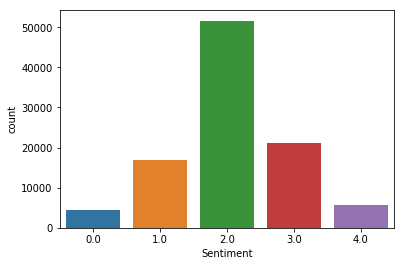

-----------------------


In [86]:
# 로튼토마토 영화리뷰자료를 이용한 다항 로지스틱회귀 분석
# 감상평은 0부정 2중립 4긍정 으로 분류

movies = pd.read_csv('RottenTomato.txt', sep='\t')
  
# EDA
print(movies.head())
print('-----------------------')
print(movies.tail())
print('-----------------------')
print(movies.info())
print('-----------------------')
print(movies.describe())
print('-----------------------')

# 전체 자료수
print('전체 자료수 => ', movies.count())
print('-----------------------')

# 결측치 여부 확인
print('결측치 여부 확인 => ', movies.isnull().sum())
print('-----------------------')

movies = movies.dropna()

print('결측치 여부 확인 => ', movies.isnull().sum())
print('-----------------------')


# 분류값 시각화
print(movies['Sentiment'].value_counts())
print('-----------------------')

sns.countplot(movies['Sentiment'])
plt.show()
print('-----------------------')





In [92]:


# 전처리 : 대소문자 변환. tfidf 벡터라이즈
import re

data = movies['Phrase'].str.lower() # 문자로 바꾸고, 소문자로 바꾸고
target = movies['Sentiment']


print('데이터 헤드 => ', data.head())
print('---------')
tmp = []
for line in data:
  line = re.sub('[^a-z]',' ', line) # 숫자/기호 제거
  line = re.sub('[\s+]',' ', line) # 공백 하나로.. -_-a ㅋㅋ
  tmp.append(''.join(line.strip()))

data = tmp
print(data[:5])



# Vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# 훈련/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1907081230)

# 문자 데이터를 숫자 벡터로 변환
vectors = TfidfVectorizer()
vX_train = vectors.fit_transform(X_train)
vX_test = vectors.transform(X_test)
# fit_transform : fit과 transform 둘다 한다는 것. 단어사전 생성 후 tfidf 조사
# transform : 위에서 이미 생성된 단어사전을 토대로 (굳이 다시 생성하지 않고. 즉 fit 제외), tfidf 조사

# 다항 로지스틱 회귀
lgr = LogisticRegression(solver='saga', multi_class='multinomial') # 종속변수가 다항 (2개 초과)
lgr.fit(vX_train, y_train)
pred = lgr.predict(vX_test)

# 분석평가

print('훈련정확도', lgr.score(vX_train, y_train))
print('검증정확도', lgr.score(vX_test, y_test))
print(confusion_matrix(y_test, pred))


#for i in range(10):
#    print(pred[i], '/', X_test[i], '/', y_test[i])
# 위 오류남 -_-;;

yy_test = list(y_test) # 리스트로 변환 -_-;;; 흐음.. <--------------------------------------------------------------- 유의

for i in range(10):
    print(pred[i], '/', X_test[i], '/', yy_test[i])
    
# 하여간 뭐 안 맞아서 안 돌아가면 리스트로 변환 하는 것 염두에 둘 것!!

데이터 헤드 =>  0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
Name: Phrase, dtype: object
---------
['a series of escapades demonstrating the adage that what is good for the goose is also good for the gander   some of which occasionally amuses but none of which amounts to much of a story', 'a series of escapades demonstrating the adage that what is good for the goose', 'a series', 'a', 'series']
훈련정확도 0.6963636363636364
검증정확도 0.6422956605438357
[[  200   575   326    39     2]
 [  102  1536  2389   161     3]
 [   21   649 11490   761    18]
 [    5   118  2486  2422   188]
 [    0    16   232   828   367]]
2.0 / basic black / 2.0
2.0 / a fullness that does not negate the subject / 3.0
2.0 / steals the show without resorting to camp as nicholas   wounded and woundin